# Introduction

What is Clustering in Machine Learning?

A Clustering algorithm is a type of Unsupervised Machine Learning algorithm which groups unlabelled dataset into different clusters based on the similarity in data points through various features of dataset.

Different Clustering techniques:
* k-Means Clustering
* Hierarchical Clustering
* Fuzzy Analysis Clustering
* Mean Shift Clustering
* DBSCAN – Density-based Spatial Clustering
* Gaussian Mixed Models (GMM) with Expectation-Maximization Clustering

Where is Clustering used:
* In movie recommendation systems for Netflix where a huge amount of data consisting of different movies watched by the customers are available. The algorithm groups customers with similar interest and movies that people with that interest have watched is suggested to the other users.
* It is used in image segmentation in bioinformatics to detect cancerous cells in the body, overcoming many possible human errors.
* Grouping documents to prevent spread of fake news on Social Media
* Text clustering: In academics, clustering can be used in the associative analysis of various documents which is used in plagiarism, copyright infringement, patent analysis etc

Dataset Link:

https://www.kaggle.com/rohan0301/unsupervised-learning-on-country-data

This dataset consists different features which help identifying the level of a country in this developing world!

The different features and their description are:

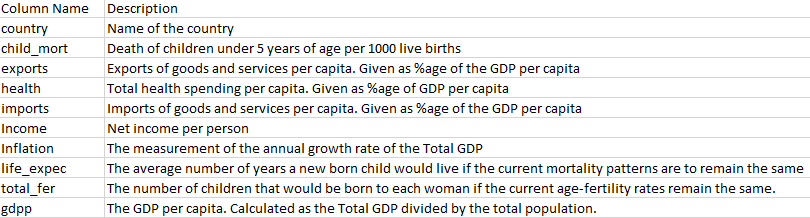


All the columns, except for the first, country name, will help clustering the countries.

The algorithms used will be K-Means Clustering and Hierarchical Clustering.
The models will be trained with the dataset and the best model will be used to cluster and visualize the dataset.

# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [2]:
dataset = pd.read_csv('Country-data.csv')
dataset

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
X = dataset.iloc[:,1:].values
X

array([[9.02e+01, 1.00e+01, 7.58e+00, ..., 5.62e+01, 5.82e+00, 5.53e+02],
       [1.66e+01, 2.80e+01, 6.55e+00, ..., 7.63e+01, 1.65e+00, 4.09e+03],
       [2.73e+01, 3.84e+01, 4.17e+00, ..., 7.65e+01, 2.89e+00, 4.46e+03],
       ...,
       [2.33e+01, 7.20e+01, 6.84e+00, ..., 7.31e+01, 1.95e+00, 1.31e+03],
       [5.63e+01, 3.00e+01, 5.18e+00, ..., 6.75e+01, 4.67e+00, 1.31e+03],
       [8.31e+01, 3.70e+01, 5.89e+00, ..., 5.20e+01, 5.40e+00, 1.46e+03]])

# K-Means Clustering

K-Means Clustering involves partition of the datapoints into k number of clusters in which each observation belongs to the cluster with the nearest centroid, serving as a prototype of the cluster.

K-Means Clustering follows the following steps:
1. Number of clusters k is chosen and the same number of centroids, k are chosen
2. By Euclidean or Manhattan distance, points are assigned to nearest centroid
3. Now centroid of each newly formed group is calculated.
4. It the position of this cetroid is diiferent fron that of the assumed centroid, then the datapoints are again assigned to the new centroids and step 3 is carried out.
5. Optimal number of clusters k, is found using 'The Elbow Method'

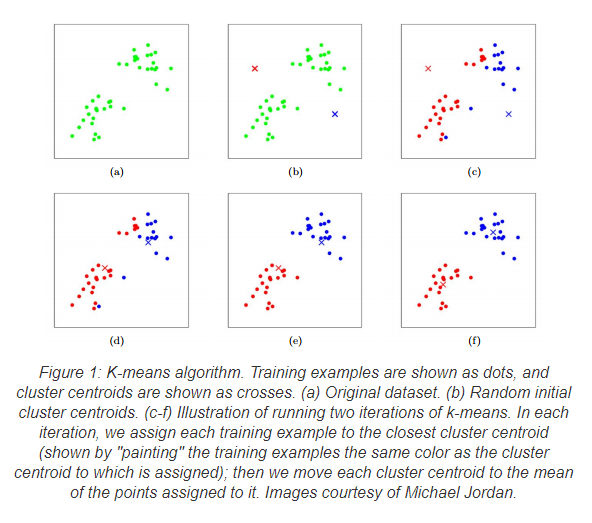

## Using the elbow method to find the optimal number of clusters

FIrst, the elbow method is used to find optimal k before proceeding to forming groups of datapoints. 

The Elbow Method gives the optimal number of clusters. The point at which the slope (of WCSS vs Number of Clusters graph) changes abruptly depicts the optimal number of clusters.

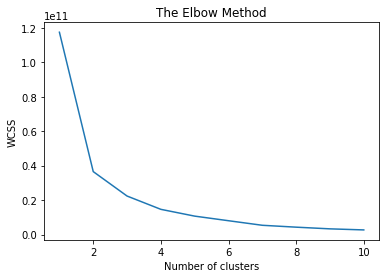

In [4]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,10+1):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel("Number of clusters")
plt.ylabel('WCSS')
plt.show()

Here, optimal number of clusters is 2...

## Training the K-Means model on the dataset

It fits and returns dependant variables values, which has two different values (0,1) corresponding to two different clusters containing different grps of countries, grouped by similarities

In [5]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)#any randomState no
y_kmeans = kmeans.fit_predict(X)
kmeans.cluster_centers_

array([[4.60155556e+01, 3.75866593e+01, 6.42029630e+00, 4.69923400e+01,
        9.60268889e+03, 8.71334815e+00, 6.82940741e+01, 3.19881481e+00,
        5.34899259e+03],
       [5.59375000e+00, 5.59687500e+01, 8.48375000e+00, 4.64593750e+01,
        4.89625000e+04, 3.85200000e+00, 8.00968750e+01, 1.88968750e+00,
        4.50906250e+04]])

In [6]:
print(y_kmeans) 

[0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]


# Hierarchical Clustering

Hierarchical Clustering is a method of cluster analysis which involves building of a hierarchy of clusters.

It involves the following steps:
1. Each datapoint is initially considered a cluster. So N datapoints form N clusters.
2. Two closest datapoints (or clusters) form one cluster, and two closest clusters combine forming one cluster.
3. Step 2 keeps on repeating until there's only 1 cluster left!
4. A dendrogram is plotted and the longest vertical line between two hypothetical horizontal lines is considered. The number of such vertical lines beside it, in the same level, represent the optimal number of clusters...

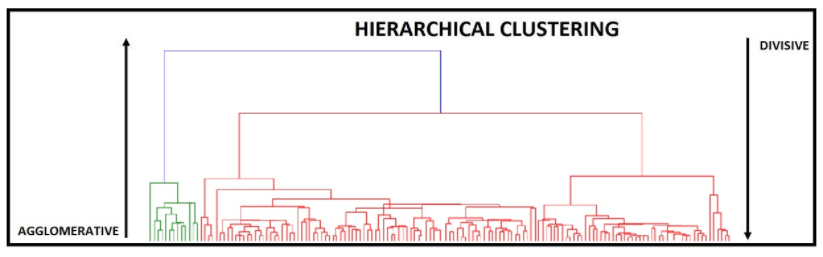

## Using the dendrogram to find the optimal number of clusters

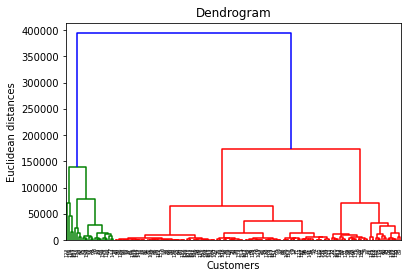

In [7]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

The optimal number of clusters is hence, 2...

## Training the Hierarchical Clustering model on the dataset

In [8]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [9]:
print(y_hc)

[0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]


# Comparing the efficiency using Silhouette Score

* The best value that could be attained is 1 and the worst value is -1. 
* Silhouette values near 0 indicate overlapping clusters. 
* Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

### K-means clustering

In [10]:
from sklearn.metrics import silhouette_score
silhouette_score(X,y_kmeans)

0.7256314906273207

### Hierarchical clustering

In [11]:
from sklearn.metrics import silhouette_score
silhouette_score(X,y_hc)

0.7228222144066916

With K-means algorithm showing a little highe silhouette score, we can conclude tha K-Means Clustering Algorithm is the better algorithm for the given dataset.

# Visualization

In [12]:
dataset['KMeans_labels'] = y_kmeans
dataset

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [13]:
dataset.groupby(['KMeans_labels','country']).mean()

child_mort  exports  ...  total_fer   gdpp
KMeans_labels country                                    ...                  
0             Afghanistan                 90.2     10.0  ...       5.82    553
              Albania                     16.6     28.0  ...       1.65   4090
              Algeria                     27.3     38.4  ...       2.89   4460
              Angola                     119.0     62.3  ...       6.16   3530
              Antigua and Barbuda         10.3     45.5  ...       2.13  12200
...                                        ...      ...  ...        ...    ...
1             Sweden                       3.0     46.2  ...       1.98  52100
              Switzerland                  4.5     64.0  ...       1.52  74600
              United Arab Emirates         8.6     77.7  ...       1.87  35000
              United Kingdom               5.2     28.2  ...       1.92  38900
              United States                7.3     12.4  ...       1.93  48400

[167 rows x 9 columns]

In [14]:
import plotly.express as px
fig = px.choropleth(dataset, locations='country',locationmode="country names", color='KMeans_labels',scope='world') 
fig.show()

Thus, yellow or 1 represents "Developed countries"
and, blue or 0 represents "Developing countries"

Thus the countries are group as follows:

In [42]:
# Developing Countries
dataset[dataset['KMeans_labels']==0].iloc[:,0]

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 135, dtype: object

In [43]:
# Developed Countries
dataset[dataset['KMeans_labels']==1].iloc[:,0]

7                 Australia
8                   Austria
11                  Bahrain
15                  Belgium
23                   Brunei
29                   Canada
42                   Cyprus
44                  Denmark
53                  Finland
54                   France
58                  Germany
60                   Greece
68                  Iceland
73                  Ireland
74                   Israel
75                    Italy
77                    Japan
82                   Kuwait
91               Luxembourg
110             Netherlands
111             New Zealand
114                  Norway
115                    Oman
123                   Qatar
128            Saudi Arabia
133               Singapore
139                   Spain
144                  Sweden
145             Switzerland
157    United Arab Emirates
158          United Kingdom
159           United States
Name: country, dtype: object

# Conclusion

Thus, the countries have been classified into developed and developing countries. The K Means algorithm has been found to give better silhouette score of 0.7256314906273207 which is quite satisfactory!

References:

* https://www.analytixlabs.co.in/blog/types-of-clustering-algorithms/